In [24]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
file_path ='../data/bank/bs140513_032310.csv'
file = pd.read_csv(file_path)

In [4]:
df = file.copy()
# clean the data
df = df.drop(['zipcodeOri', 'zipMerchant'], axis = 1)
#clumn by column
#df['customer'] = [x.strip("'") for x in df['customer']]
#df['age'] = [x.strip("'") for x in df['age']] 
#df['gender'] = [x.strip("'") for x in df['gender']] 
#df['merchant'] = [x.strip("'") for x in df['merchant']] 
#df['zipMerchant'] = [x.strip("'") for x in file['zipMerchant']] 
#df['category'] = [x.strip("'") for x in file['category']]



#clean the data. remove the unused ''
def remove_quote_marks(column):
    if column.dtype == object:
        return column.apply(lambda x: x.strip("'"))
    else:
        return column

for column in df:
    df[column] = remove_quote_marks(df[column])

df

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0
5,0,C1315400589,3,F,M348934600,es_transportation,25.81,0
6,0,C765155274,1,F,M348934600,es_transportation,9.10,0
7,0,C202531238,4,F,M348934600,es_transportation,21.17,0
8,0,C105845174,3,M,M348934600,es_transportation,32.40,0
9,0,C39858251,5,F,M348934600,es_transportation,35.40,0


In [5]:
#ugly but necessary
#df['age']= df['age'].replace({'U': '-1'})

#clean the data. turn str into ints if possible
#for column in df.select_dtypes(include=['object']):
#    if df[column].iloc[0].isdigit():
#        df[column] = pd.to_numeric(df[column], downcast='integer')


#df.describe()

#aggregators = ['mean', 'std']
#grouped_by_age = df.groupby('age')
#aggregated_grouped_by_age = grouped_by_age.agg({'amount': aggregations, 'fraud': 'sum'})
#aggregated_grouped_by_age

In [6]:
df_with_fraud = df.loc[df['fraud'] == 1]
df_with_fraud_by_step = df_with_fraud.groupby(['category', 'gender', 'age'])
aggregators = ['sum']
df_new_fraud = df_with_fraud_by_step.agg({'amount':aggregators})#plot(kind='bar')


In [7]:
df_new_fraud.sort_values(by=('amount', 'sum'), ascending=False).head(10)

amount
                                   sum
category         gender age           
es_travel        F      2    365448.56
                        3    237907.85
                 M      2    206703.23
                 F      4    165515.36
es_health        F      2    163409.13
es_sportsandtoys F      2    148071.04
es_travel        M      3    140316.96
es_sportsandtoys F      3    108309.22
es_travel        M      4    102088.92
                 F      1     98568.83

In [8]:
df_groupped = df.groupby(['category', 'gender', 'age'])
aggregators = ['sum']
df_new_all = df_groupped.agg({'amount':aggregators})
df_new_all.sort_values(by=('amount', 'sum'), ascending=False).head(10)

amount
                                     sum
category          gender age            
es_transportation F      2    2378227.41
                  M      2    1907762.38
                  F      3    1781093.24
                  M      3    1579846.55
                  F      4    1343902.80
                  M      4    1149269.54
                  F      5     779227.64
                         1     752635.34
                  M      5     660339.53
                         1     575551.20

In [19]:
prozent_fraud = (df_new_fraud/df_new_all)
prozent_fraud = prozent_fraud.loc[prozent_fraud[('amount', 'sum')].notnull()]


In [31]:
display(prozent_fraud.sort_values(by=('amount', 'sum'), ascending=True).head(20))

amount
                                       sum
category              gender age          
es_fashion            M      6    0.003060
es_barsandrestaurants M      1    0.018777
                      F      5    0.019022
es_fashion            M      3    0.024506
es_tech               M      5    0.032539
es_barsandrestaurants M      3    0.038355
                             4    0.039984
es_fashion            M      2    0.039990
es_barsandrestaurants M      6    0.040328
es_fashion            M      5    0.042596
es_hyper              M      5    0.050847
es_barsandrestaurants F      6    0.053393
es_tech               M      1    0.053979
es_fashion            M      1    0.054769
                      F      1    0.055297
es_barsandrestaurants M      2    0.066969
es_health             E      U    0.067561
es_barsandrestaurants M      5    0.073395
es_fashion            F      3    0.076964
                             4    0.080256

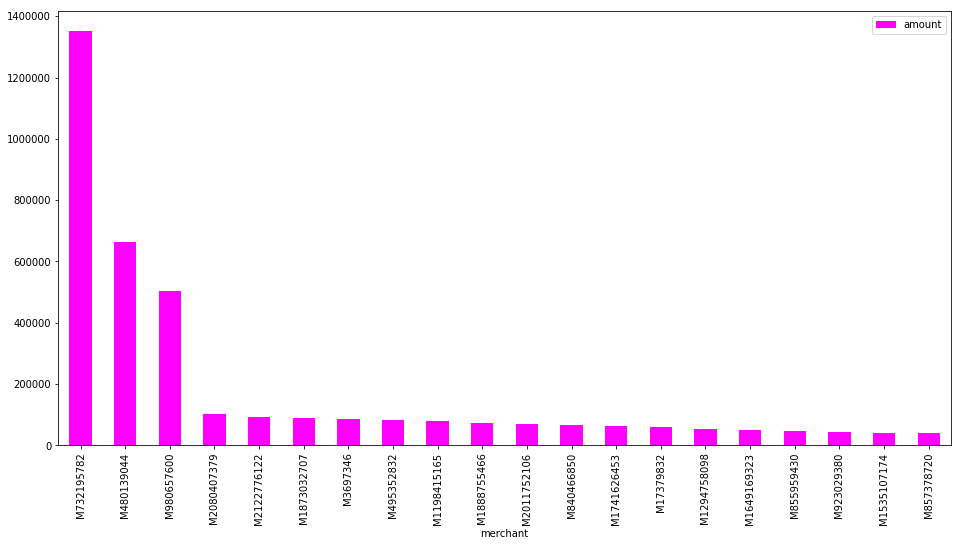

In [30]:
df_with_fraud = df.loc[df['fraud'] == 1]
df_with_fraud_by_step = df_with_fraud.groupby('merchant')
aggregators = ['sum']
df_with_fraud_by_step.agg({'amount':'sum'}).sort_values(by='amount', ascending=False).head(20).plot(kind='bar', figsize=(16,8), color='magenta')

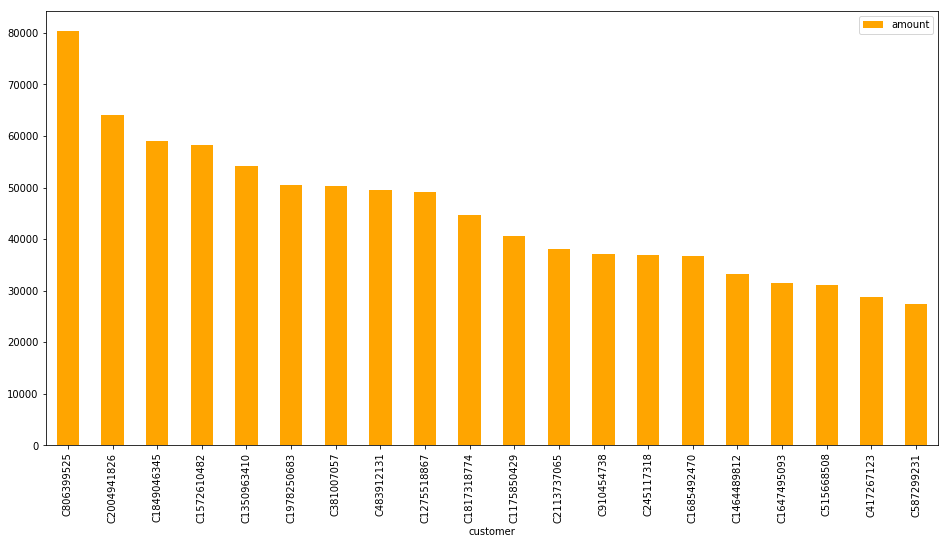

In [27]:
df_with_fraud = df.loc[df['fraud'] == 1]
df_with_fraud_by_step = df_with_fraud.groupby('customer')
aggregators = ['sum']
df_with_fraud_by_step.agg({'amount':'sum'}).sort_values(by='amount', ascending=False).head(20).plot(kind='bar', figsize=(16,8), color='orange')

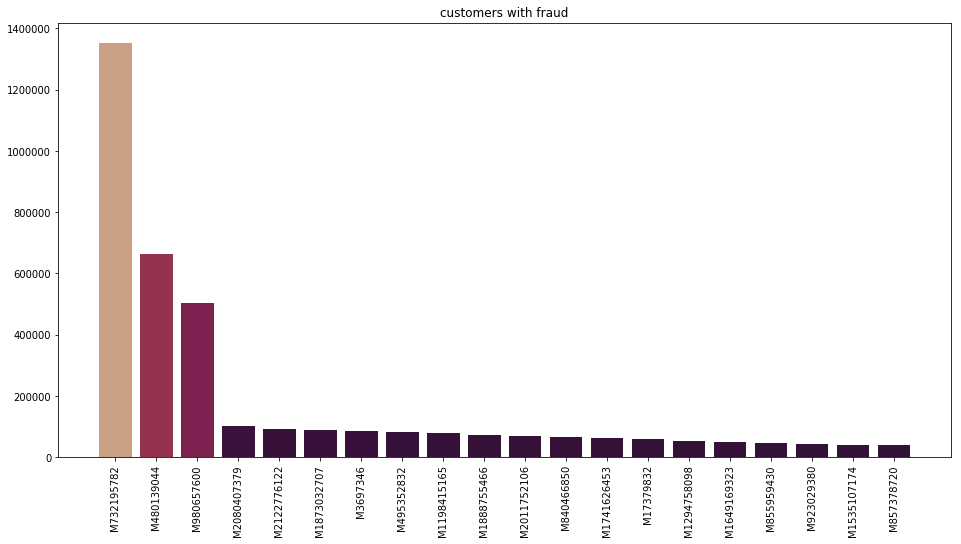

In [55]:
data_to_plot = df_with_fraud_by_step.agg({'amount':'sum'}).sort_values(by='amount', ascending=False).head(20)
x = data_to_plot.index
y = data_to_plot['amount']
num_groups = data_to_plot.shape[0]
color_map = cm.get_cmap('twilight_shifted_r')

# the figure
plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')
plt.title('customers with fraud')


#define a weight for the colors
total = y.sum()

# the colors
color_array = list()
for idx in range(0, num_groups):
    color_idx =  int(y[idx] * color_map.N/total)
    color_value = color_map.colors[color_idx]
    color_array.append(mpl.colors.to_hex(color_value))

# the barplot
plt.bar(x, y, color=color_array);

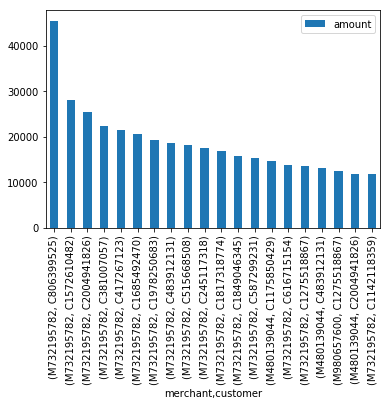

In [57]:
df_with_fraud = df.loc[df['fraud'] == 1]
df_with_fraud_by_step = df_with_fraud.groupby(['merchant', 'customer'])
aggregators = ['sum']
df_with_fraud_by_step.agg({'amount':'sum'}).sort_values(by='amount', ascending=False).head(20).plot(kind='bar')

In [86]:
df_with_fraud_by_step.agg({'amount':'sum'}).sort_values(by='amount', ascending=False)
display(data_to_plot.index.names)
str(('bla', 'blub'))

FrozenList(['merchant', 'customer'])

"('bla', 'blub')"

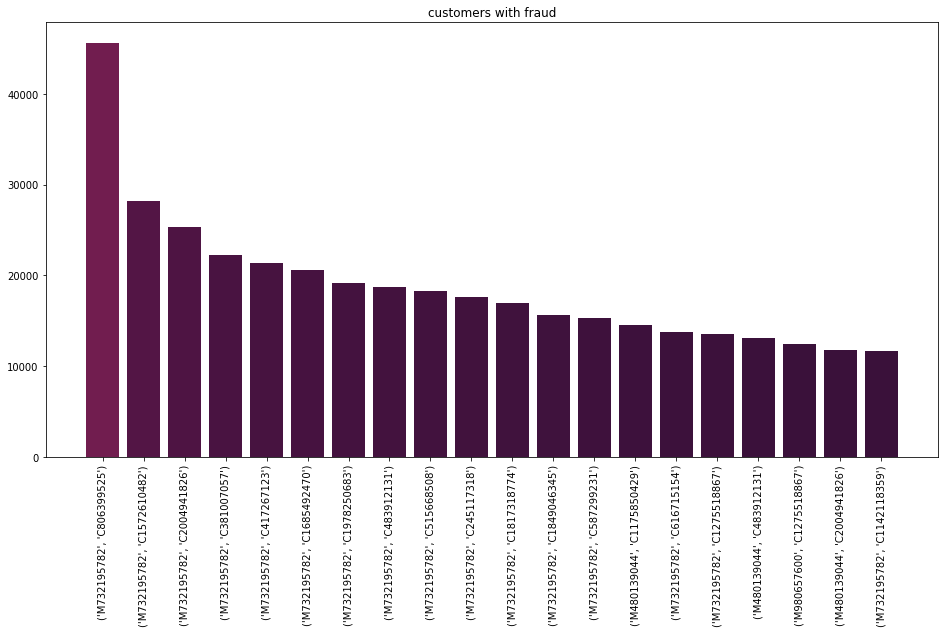

In [87]:
#turning the tuples into str 
labels = list(map(lambda x: str(x), data_to_plot.index))
data_to_plot = df_with_fraud_by_step.agg({'amount':'sum'}).sort_values(by='amount', ascending=False).head(20)
x = labels
y = data_to_plot['amount']
num_groups = data_to_plot.shape[0]
color_map = cm.get_cmap('twilight_shifted_r')



# the figure
plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')
plt.title('customers with fraud')


#define a weight for the colors
total = y.sum()

# the colors
color_array = list()
for idx in range(0, num_groups):
    color_idx =  int(y[idx] * color_map.N/total)
    color_value = color_map.colors[color_idx]
    color_array.append(mpl.colors.to_hex(color_value))


# the barplot
plt.bar(x, y, color=color_array);

In [52]:
df_with_fraud_by_step.agg({'amount':'sum'})

amount    M732195782
dtype: object

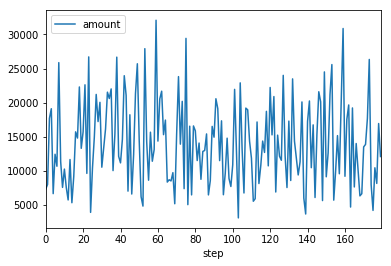

In [37]:
focus_merchant = 'M732195782'#this merchant has only category travel
focus_merchant2 = 'M480139044'#this merchant has only category travel
focus_merchant3 = 'M980657600'#this merchant has only category travel
filters = ((df['merchant'] == focus_merchant) | (df['merchant'] == focus_merchant2) | (df['merchant'] == focus_merchant3)) & (df['fraud'] == 1)
filtered_m = df.loc[filters]
filtered_m.groupby('step').agg({'amount':'sum'}).plot()
#filtered_m.groupby('category').agg({'amount': 'sum'}).plot(kind='bar')


In [36]:
import numpy as np
from scipy.signal import argrelextrema

#find local maxima
x = np.array(filtered_m.groupby('step').agg({'amount':'sum'})['amount'])

idx = argrelextrema(x, np.greater)
idx
#print(idx)


(array([  3,   5,   7,  10,  13,  16,  18,  21,  23,  27,  29,  33,  35,
         38,  42,  45,  49,  53,  56,  59,  62,  64,  66,  68,  71,  73,
         75,  77,  79,  82,  86,  89,  91,  94,  97, 101, 104, 107, 113,
        116, 118, 120, 122, 124, 127, 130, 132, 137, 141, 143, 146, 149,
        153, 156, 159, 162, 164, 166, 173, 176, 178]),)

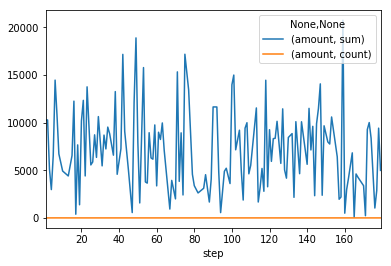

In [68]:
filters = (df['fraud'] == 1) & (df['gender'] == 'F') & (df['category'] == 'es_travel')
filtered_df = df.loc[filters]
grouped_filtered_df = filtered_df.groupby('step')
aggregators = ['sum', 'count']
grouped_filtered_df.agg({'amount': aggregators}).plot()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


amount             fraud
          mean         std   sum
age                             
0    46.602896  146.118480    48
1    37.530909  107.821610   689
2    38.358458  122.970239  2344
3    37.879718  107.359732  1755
4    38.201522  108.004893  1410
5    36.426231   93.434816   686
6    36.865624  106.007546   261
U    36.627623   55.069172     7

In [ ]:
############################################

In [248]:
groupped_by_merchant = df.groupby('merchant')
groupped_by_merchant.agg({'amount':'count'}).idxmax()


amount    M1823072687
dtype: object

#merchant with most transactions

In [249]:
merchants_and_fraud = groupped_by_merchant.agg({'fraud':'count'})
print('merchant with most frauds {}\nmerchant with less frauds {}'.format(merchants_and_fraud.idxmax(), 
                                                                          merchants_and_fraud.idxmin()))

merchant with most frauds fraud    M1823072687
dtype: object
merchant with less frauds fraud    M1726401631
dtype: object


In [250]:
frauds_and_amount = df.loc[:, ['fraud', 'amount']]
mean_with_fraud = frauds_and_amount.loc[frauds_and_amount['fraud'] == 1].agg(['mean'])
mean_without_fraud = frauds_and_amount.loc[frauds_and_amount['fraud'] == 0].agg(['mean'])
num_fraud = len(frauds_and_amount.loc[frauds_and_amount['fraud'] == 1])
num_no_fraud = len(frauds_and_amount.loc[frauds_and_amount['fraud'] == 0])

print('transactions with fraud (total of {}) have a mean value of: {}\ntransactions without fraud (total of {}) have a mean value of: {}'
      .format(num_fraud,mean_with_fraud['amount'],num_no_fraud, mean_without_fraud['amount']))

transactions with fraud (total of 7200) have a mean value of: mean    530.926551
Name: amount, dtype: float64
transactions without fraud (total of 587443) have a mean value of: mean    31.84723
Name: amount, dtype: float64


In [251]:
#check customer C1000148617
specific_customer = df.loc[df['customer'] == 'C1000148617']

# max is the max value of the strin amoing all merchants, it is not the merchant that appears the most!
specific_customer.loc[:, 'merchant'].agg('max')

'M85975013'

In [252]:
specific_customer.groupby('merchant').agg({'amount': 'count'})

,amount
merchant,
M1053599405,1
M1400236507,1
M1741626453,1
M1823072687,92
M1842530320,1
M1888755466,2
M1946091778,1
M209847108,1
M348934600,22


In [253]:

print(specific_customer.groupby('merchant').agg({'amount': 'count'}).idxmax())

amount    M1823072687
dtype: object


In [254]:
#going to work with the customers
customers_with_fraud = df.loc[df['fraud'] == 1].groupby('customer')
#customer with most frauds
customer_with_most_frauds_id = customers_with_fraud.agg({'amount':'count'}).idxmax()['amount']
customer_with_most_frauds_id

'C1350963410'

In [255]:
customers_with_fraud.agg({'amount':'count'}).sort_values(by='amount', ascending=False).head()

,amount
customer,
C1350963410,144
C1849046345,127
C806399525,125
C2004941826,119
C1275518867,114


In [256]:
#customer with highest amount of money frauded
customer_with_most_money_fraud_id = customers_with_fraud.agg({'amount':'sum'}).idxmax()['amount']
customer_with_most_money_fraud_id

'C806399525'

In [257]:
customers_with_fraud.agg({'amount':'sum'}).sort_values(by='amount', ascending=False).head()

,amount
customer,
C806399525,80324.04
C2004941826,64165.54
C1849046345,59066.72
C1572610482,58203.13
C1350963410,54274.78


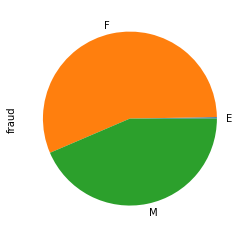

In [258]:
#which gender is the most fraudulent
customers_and_gender = df.loc[:, ['customer', 'gender', 'fraud']]
customers_and_gender_with_fraud = customers_and_gender.loc[customers_and_gender['fraud'] == 1]
customers_and_gender_with_fraud.drop_duplicates().groupby('gender').agg('count').plot(kind='pie', y='fraud', legend=False)

In [264]:
#build a graphic to see if more transactaction mean more fraud
df

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0
5,0,C1315400589,3,F,M348934600,es_transportation,25.81,0
6,0,C765155274,1,F,M348934600,es_transportation,9.10,0
7,0,C202531238,4,F,M348934600,es_transportation,21.17,0
8,0,C105845174,3,M,M348934600,es_transportation,32.40,0
9,0,C39858251,5,F,M348934600,es_transportation,35.40,0


In [265]:
customer_df = df.groupby('customer')
#number_of_transactions_per_costumer = customer_df.agg({'amount':'count'}).sort_values(by='amount', ascending=False)

In [266]:
#number_of_transactions_per_costumer_fraud = customers_with_fraud.agg({'amount':'count'}).sort_values(by='amount', ascending=False)

In [267]:
#number_of_transactions_per_costumer.merge

In [272]:
customer_df.agg(['mean'])

,step,amount,fraud
,mean,mean,mean
customer,,,
C1000148617,107.786260,35.091908,0.007634
C100045114,124.532110,90.336239,0.045872
C1000699316,51.436170,38.154894,0.000000
C1001065306,91.833333,204.754667,0.366667
C1002658784,107.702290,34.253282,0.000000
C1002759277,89.548780,28.726646,0.000000
C1004109477,96.179012,29.249691,0.000000
C1004300450,94.044693,33.826536,0.000000


In [ ]:
##############################################################################################

In [7]:
#turn age column to int
file['age']= file['age'].replace({'U': '-1'})
file['age'] = pd.to_numeric(file['age'], downcast='integer')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111d4efd0>]],
      dtype=object)

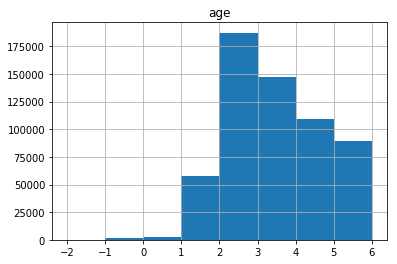

In [8]:
file.hist(column= 'age', bins=[-2, -1, 0, 1, 2, 3, 4, 5, 6])

In [9]:
grouped_by_age = file.groupby('age').agg({'amount': 'count'})
grouped_by_age

,amount
age,
-1,1178
0,2452
1,58131
2,187310
3,147131
4,109025
5,62642
6,26774


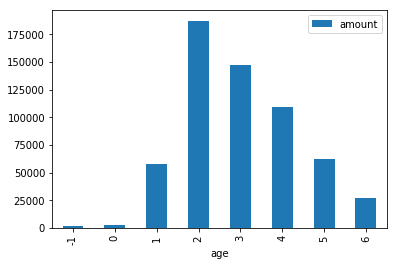

In [10]:
grouped_by_age.plot(kind='bar')

In [11]:
groupped_by_age = file.groupby('age')
print(type(groupped_by_age))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [12]:
sort_by_age = file.sort_values(by='age')
file.agg({'age':'min'})

age   -1
dtype: int64

In [13]:
groupped_by_gender = file.groupby('gender')
gender_aggregated = groupped_by_gender.amount.agg(['count', 'max', 'min', 'mean'])
gender_aggregated

,count,max,min,mean
gender,,,,
E,1178,1215.63,0.00,36.627623
F,324565,7665.56,0.00,39.213044
M,268385,8329.96,0.00,36.308094
U,515,306.80,0.11,31.508932


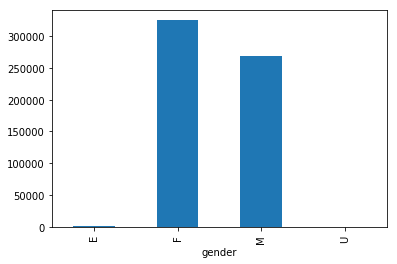

In [14]:
gender_aggregated['count'].plot(kind='bar')

In [15]:
groupped_by_amount = file.groupby('amount')
file['amount'].agg(['mean', 'min', 'max', 'std'])

mean      37.890135
min        0.000000
max     8329.960000
std      111.402831
Name: amount, dtype: float64

In [16]:
file['amount'].describe()

count    594643.000000
mean         37.890135
std         111.402831
min           0.000000
25%          13.740000
50%          26.900000
75%          42.540000
max        8329.960000
Name: amount, dtype: float64

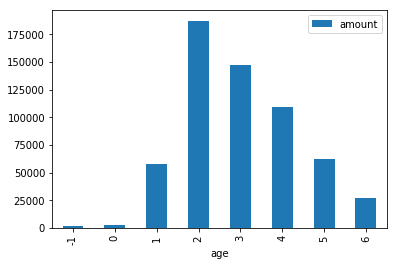

In [21]:
subfile_grouppedbyage = file.loc[:, ['age', 'amount']].groupby('age')
subfile_grouppedbyage.agg({'amount':'count'}).plot(kind='bar')

In [27]:
agg_by_amount = subfile_grouppedbyage.agg({'amount':'count'})
agg_by_amount

,amount
age,
-1,1178
0,2452
1,58131
2,187310
3,147131
4,109025
5,62642
6,26774


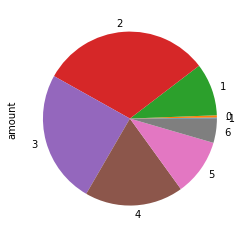

In [37]:
pieplot= agg_by_amount.plot(kind='pie', y='amount', legend=False)